## Модель для определения стоимости автомовиля.

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения

## Описание данных
Данные находятся в файле /datasets/autos.csv.

**Признаки**

 - DateCrawled — дата скачивания анкеты из базы
 - VehicleType — тип автомобильного кузова
 - RegistrationYear — год регистрации автомобиля
 - Gearbox — тип коробки передач
 - Power — мощность (л. с.)
 - Model — модель автомобиля
 - Kilometer — пробег (км)
 - RegistrationMonth — месяц регистрации автомобиля
 - FuelType — тип топлива
 - Brand — марка автомобиля
 - NotRepaired — была машина в ремонте или нет
 - DateCreated — дата создания анкеты
 - NumberOfPictures — количество фотографий автомобиля
 - PostalCode — почтовый индекс владельца анкеты (пользователя)
 - LastSeen — дата последней активности пользователя

**Целевой признак**

 - Price — цена (евро)

# 1. Подготовка данных

In [1]:
import pandas as pd

data =  pd.read_csv(r'C:\Users\Asus\Documents\Python Scripts\github praktikum\10 Численные методы\data_numer_methods.csv')

data.head().T

,0,1,2,3,4
DateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20
Price,480,18300,9800,1500,3600
VehicleType,NaN,coupe,suv,small,small
RegistrationYear,1993,2011,2004,2001,2008
Gearbox,manual,manual,auto,manual,manual
Power,0,190,163,75,69
Model,golf,NaN,grand,golf,fabia
Kilometer,150000,125000,125000,150000,90000
RegistrationMonth,0,5,8,6,7
FuelType,petrol,gasoline,gasoline,petrol,gasoline


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [3]:
from IPython.display import FileLink, FileLinks

data.to_csv(r'data_numer_methods.csv', index=False)

In [4]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

date_columns = ['DateCrawled' , 'DateCreated', 'LastSeen']

for name in date_columns:
    data[name] = pd.to_datetime(data[name], format = '%Y.%m.%d %H:%M:%S')
    


count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64


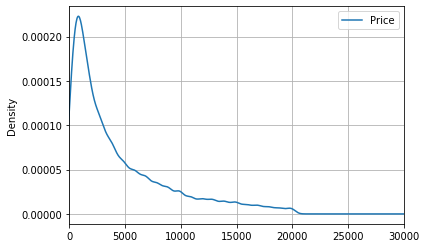

In [6]:

data.plot(y='Price', kind = 'density', grid = True, xlim = (-1,30000))

print(data['Price'].describe())

Text(0.5, 1.0, 'Brends by percent')

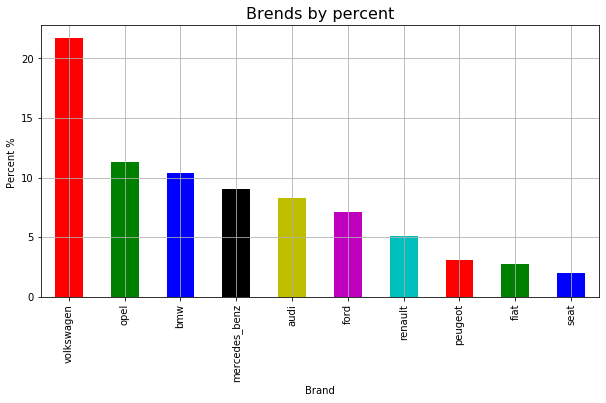

In [7]:
percent_brand = data['Brand'].value_counts()/len(data)*100

percent_brand.head(10).plot( kind = 'bar', grid = True , figsize = (10,5), color =  list('rgbkymc'))
plt.xlabel('Brand', fontsize=10)
plt.ylabel('Percent % ', fontsize=10)
plt.title('Brends by percent', fontsize=16)

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'year of registration by percent')

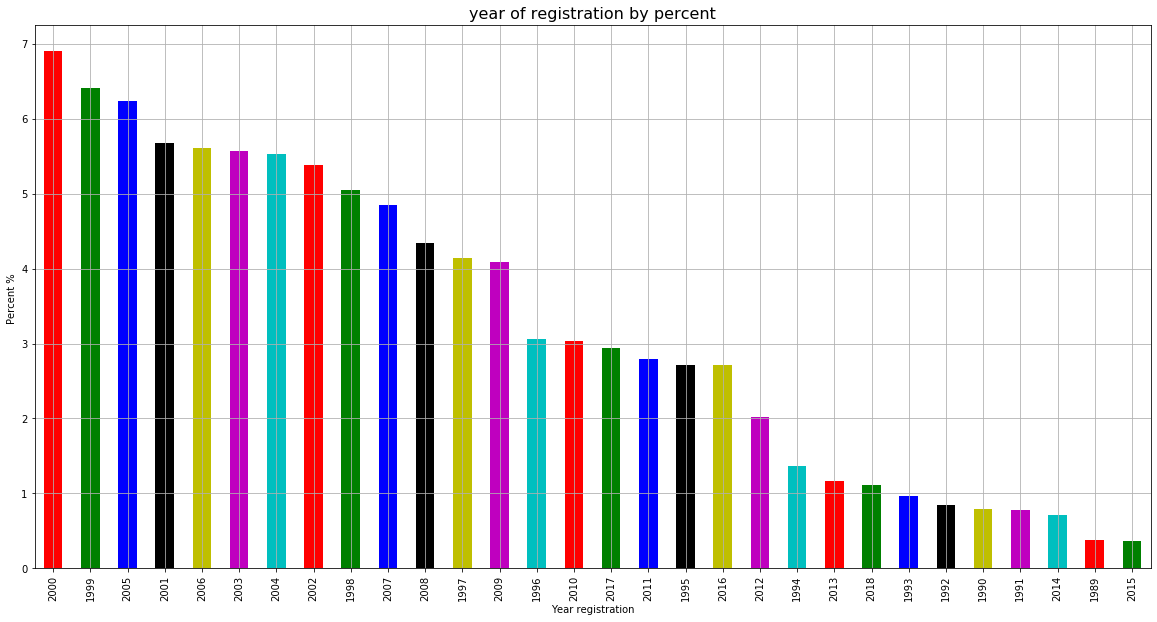

In [8]:


by_year = (data['RegistrationYear'].value_counts().sort_values(ascending = False))/len(data)*100
by_year.head(30).plot( kind = 'bar', grid = True, figsize = (20,10), colors = list('rgbkymc') )
plt.xlabel('Year registration', fontsize=10)
plt.ylabel('Percent % ', fontsize=10)
plt.title('year of registration by percent', fontsize=16)


### Вывод

Большое колическтво nan значений. Соголасно библиотека LightGBM, модель который собираемся применять в данный проект, нет необходимости обработать nan значений. Из быстрого анализа данных можно отметить что 75% машин стоят меньше 6400$, первые  бренды в продажу : volkswagen, opel, b,s , mercedes_benz y audi. 

In [9]:
# Проверка на наличие дубликатов
data.duplicated().sum()

4

In [10]:
#Выводим дубликаты
data[data.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


## Вывод

Дубликаты не являются репресентативными ввиду их малочисленость.

# 2. Обучение моделей

In [18]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [19]:
%%time

del data['DateCrawled'], data['DateCreated'], data['LastSeen']
data.head().T    


Wall time: 9.98 ms


,0,1,2,3,4
Price,480,18300,9800,1500,3600
VehicleType,nan,coupe,suv,small,small
RegistrationYear,1993,2011,2004,2001,2008
Gearbox,manual,manual,auto,manual,manual
Power,0,190,163,75,69
Model,golf,nan,grand,golf,fabia
Kilometer,150000,125000,125000,150000,90000
RegistrationMonth,0,5,8,6,7
FuelType,petrol,gasoline,gasoline,petrol,gasoline
Brand,volkswagen,audi,jeep,volkswagen,skoda


In [20]:

%%time
import numpy  as np

# Рассмотрим категоряльные feaures
list(data.loc[:, data.dtypes == np.object].columns)

Wall time: 28 ms


['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [21]:
%%time
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


# Объявление класса Encoder для того чтобы кодировать категоряльные features
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
       
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    


Wall time: 0 ns


In [22]:
%%time
from sklearn.preprocessing import StandardScaler

#Определение функций перевода тип переменую из object в str
def object_to_str(data_frame, cat_features):
    for col in cat_features:
        data_frame[col] = data_frame[col].astype('str')
    
# Определение Пайплйне который обрабативает датасет перед обучением
encoding_pipeline = Pipeline([
    ('object_to_st', object_to_str(data  ,categorical_features)),
    ('encoding',MultiColumnLabelEncoder(columns=categorical_features)),
    ('Standart_scaled', StandardScaler() ),
     ])

# Обработка датасета
df = encoding_pipeline.fit_transform(data)

# Определение датасета после обработки данных
df_encoded = pd.DataFrame(df, columns = data.columns)

# Рассмотрим полученый результат
df_encoded.head().T

Wall time: 1.03 s


,0,1,2,3,4
Price,-0.872070,3.075515,1.192548,-0.646114,-0.180910
VehicleType,-0.770762,-1.186734,0.893130,0.477157,0.477157
RegistrationYear,-0.124512,0.074983,-0.002598,-0.035848,0.041734
Gearbox,0.275837,0.275837,-1.828447,0.275837,0.275837
Power,-0.579901,0.420888,0.278671,-0.184853,-0.216457
Model,0.054878,0.669743,0.069177,0.054878,-0.159610
Kilometer,0.574823,-0.084716,-0.084716,0.574823,-1.008070
RegistrationMonth,-1.533550,-0.191778,0.613285,0.076576,0.344931
FuelType,0.742013,-1.521055,-1.521055,0.742013,-1.521055
Brand,1.285559,-1.496386,-0.518946,1.285559,0.759245


In [23]:
%%time
# Определяем таргет  и features
x = df_encoded.drop(['Price'], axis = 1)  # features
y = df_encoded['Price'] # target



# Разделение датасета на обучающий и тестовой

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

train_data = lgb.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lgb.Dataset(x_test, label=y_test)



Wall time: 96.8 ms


In [27]:
import lightgbm as lgm
from sklearn.metrics import mean_squared_error

In [28]:
%%time
# Обучение модель 1
# Матрица параметров 1
parameters_1 = { 
     'objective': 'regression',
    'metric': {'l1', 'l2'},
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 1,
    'learning_rate': 0.01,
    'num_boost_round' : 500,
         }
#обучение модель 1   
model_1 = lgm.train(parameters_1,
                       train_data,
                       valid_sets=test_data,
                       categorical_feature = categorical_features,
                        early_stopping_rounds=10,
                      verbose_eval =  False
                       )
# Предсказание для модель 1
y_pred = model_1.predict(x_test, num_iteration=model_1.best_iteration)


from  sklearn.metrics import mean_squared_error

# Выводим результаты модель 1 
print('Best Interation model 1 :', model_1.best_iteration )
print('The rmse of model 1 prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

C:\Users\Asus\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Asus\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Brand', 'FuelType', 'Gearbox', 'Model', 'NotRepaired', 'VehicleType']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Best Interation model 1 : 500
The rmse of model 1 prediction is: 0.530817240258623
Wall time: 7.28 s


In [29]:
%%time
# Обучение модель 2
# Матрица параметров 2

parameters_2 = { 
    
     'objective': 'regression',
    'metric': {'l1', 'l2'},
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq':10,
    'learning_rate': 0.9,
    'num_boost_round' : 500,
    
         }
#обучение модель 2      
model_2 = lgm.train(parameters_2,
                       train_data,
                       valid_sets=test_data,
                       categorical_feature = categorical_features,
                        early_stopping_rounds=10,
                      verbose_eval =  False
                       )
# Предсказание для модель 2
y_pred_2 = model_2.predict(x_test, num_iteration=model_2.best_iteration)

# Выводим результаты модель 2
print('Best Interation:', model_2.best_iteration )
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred_2) ** 0.5)

C:\Users\Asus\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Best Interation: 500
The rmse of prediction is: 0.3421773575413095
Wall time: 7.79 s


In [30]:
 %%time
# Обучение модель 3
# Матрица параметров 3

parameters_3 = { 
        
    'objective': 'regression',
    'metric': {'l1','l2'},
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 1,
    'learning_rate': 0.5,
            }
    
#обучение модель 3 
model_3 = lgb.train(parameters_3,
                       train_data,
                       valid_sets=test_data,
                       categorical_feature = categorical_features,
                       early_stopping_rounds=10,
                       verbose_eval =  False
                       )

# Предсказание для модель 3
y_pred_3= model_3.predict(x_test, num_iteration=model_3.best_iteration)

# Выводим результаты модель 3
print('Best Interation:', model_3.best_iteration )
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred_3) ** 0.5)

Best Interation: 100
The rmse of prediction is: 0.41503190078547353
Wall time: 2.08 s


# 3. Анализ моделей

In [31]:
# Создание модель постоянного значения для проверки качество на адвеквадности 
y_constant= pd.Series([np.mean(y_test)]*len(y_test))

# RMSE 
rmse_constant = mean_squared_error(y_test, y_constant) ** 0.5

print( "RMSE sanity check : {}".format(rmse_constant.round(2)))

RMSE sanity check : 1.0


## Вывод

Из трех модели, лучше результат показали модель 2. Получили RMSE: 0.438 что на 0,562 чем Sanity Check, и время обработки составляет 5.25 s, что на 3,35 s меньше чем следуюшая самая быстрая модель.
